# Redes Neurais Convolucionais (CNN)

### Bibliotecas básicas

In [1]:
import numpy as np
import pandas as pd
from functools import partial
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
print(tf.__version__)

2.1.0


In [2]:
tf.compat.v1.disable_eager_execution()

### Exemplo simples

In [3]:
from sklearn.datasets import load_sample_image

china = load_sample_image('china.jpg')
flower = load_sample_image('flower.jpg')
dataset = np.array([china, flower], dtype=np.float32)
batch_size, height, width, channels = dataset.shape

#### Cria dois fitros

In [11]:
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1  # linha vertical
filters[3, :, :, 1] = 1  # linha horizontal

#### Crie um gráfico com a entrada X mais uma camada convolucional aplicando os 2 filtros

In [13]:
tf.compat.v1.reset_default_graph()

X = tf.compat.v1.placeholder(tf.float32, shape=(None, height, width, channels))
convolution = tf.nn.conv2d(X, filters, strides=[1, 2, 2, 1], padding='SAME')

with tf.compat.v1.Session() as sess:
    output = sess.run(convolution, feed_dict={X: dataset})

#### Plots das imagens

In [16]:
def plot_image(image):
    plt.imshow(image, cmap='gray', interpolation='nearest')
    plt.axis('off')

def plot_color_image(image):
    plt.imshow(image.astype(np.uint8),interpolation='nearest')
    plt.axis('off')

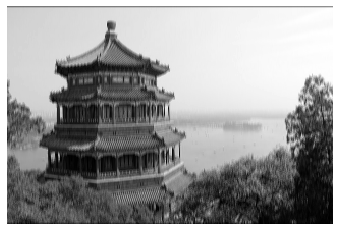

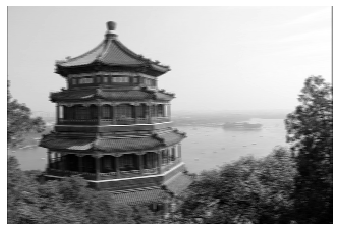

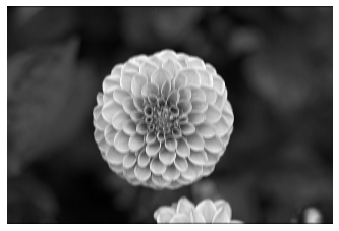

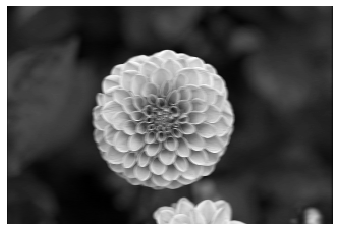

In [17]:
for image_index in (0, 1):
    for feature_map_index in (0, 1):
        plot_image(output[image_index, :, :, feature_map_index])
        plt.show()

#### Usando tf.layers.conv2d()

Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


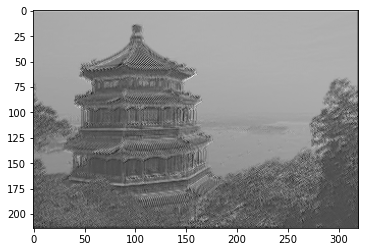

In [18]:
tf.compat.v1.reset_default_graph()

X = tf.compat.v1.placeholder(shape=(None, height, width, channels), dtype=tf.float32)
conv = tf.compat.v1.layers.conv2d(X, filters=2, kernel_size=7, strides=[2,2], padding='SAME')

init = tf.compat.v1.global_variables_initializer()

with tf.compat.v1.Session() as sess:
    init.run()
    output = sess.run(conv, feed_dict={X: dataset})
    
plt.imshow(output[0, :, :, 1], cmap='gray') #plot do segundo mapa de recursos da 1ª imagem
plt.show()